In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from benchmarks.runs.exploring_utils import RunAnalyser, adaptive_filter, non_adaptive_filter, model_filter
import re

In [2]:
run_path = '../'
test_name = 'Schrodinger1D_Stationary_20_8'
test_path = os.path.join(run_path, test_name)

In [3]:
runs = sorted([m for m in os.listdir(test_path) if os.path.isdir(os.path.join(test_path, m))])
analyser = RunAnalyser(runs, test_path)

<Figure size 700x700 with 0 Axes>

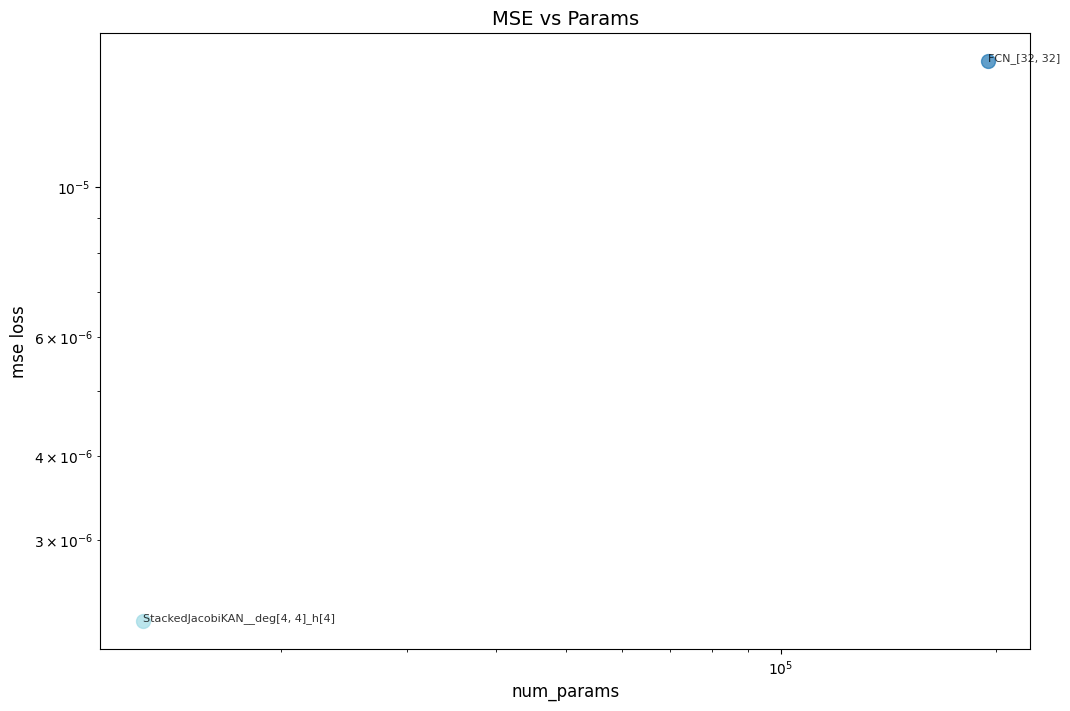

In [4]:
analyser.plot_mse_over_params()

<Figure size 700x700 with 0 Axes>

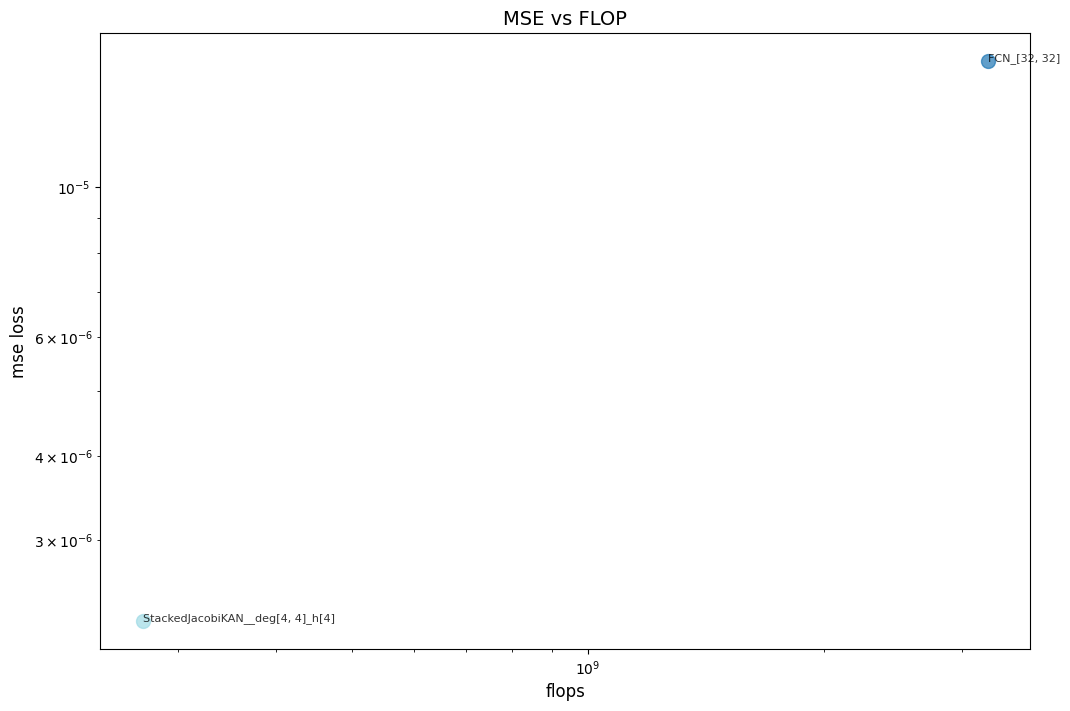

In [5]:
analyser.plot_mse_over_flops()

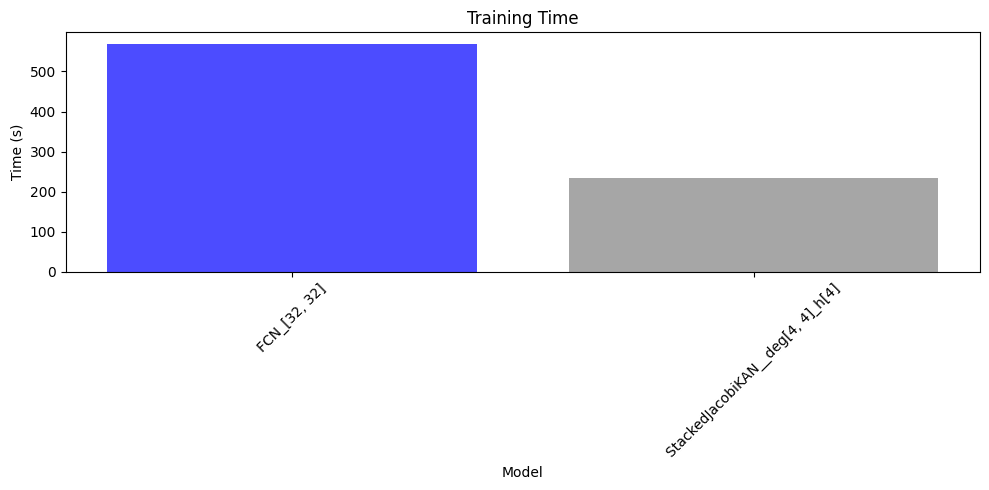

In [6]:
analyser.plot_training_times(filter=lambda x: 'Stacked' in x or 'FCN' in x)

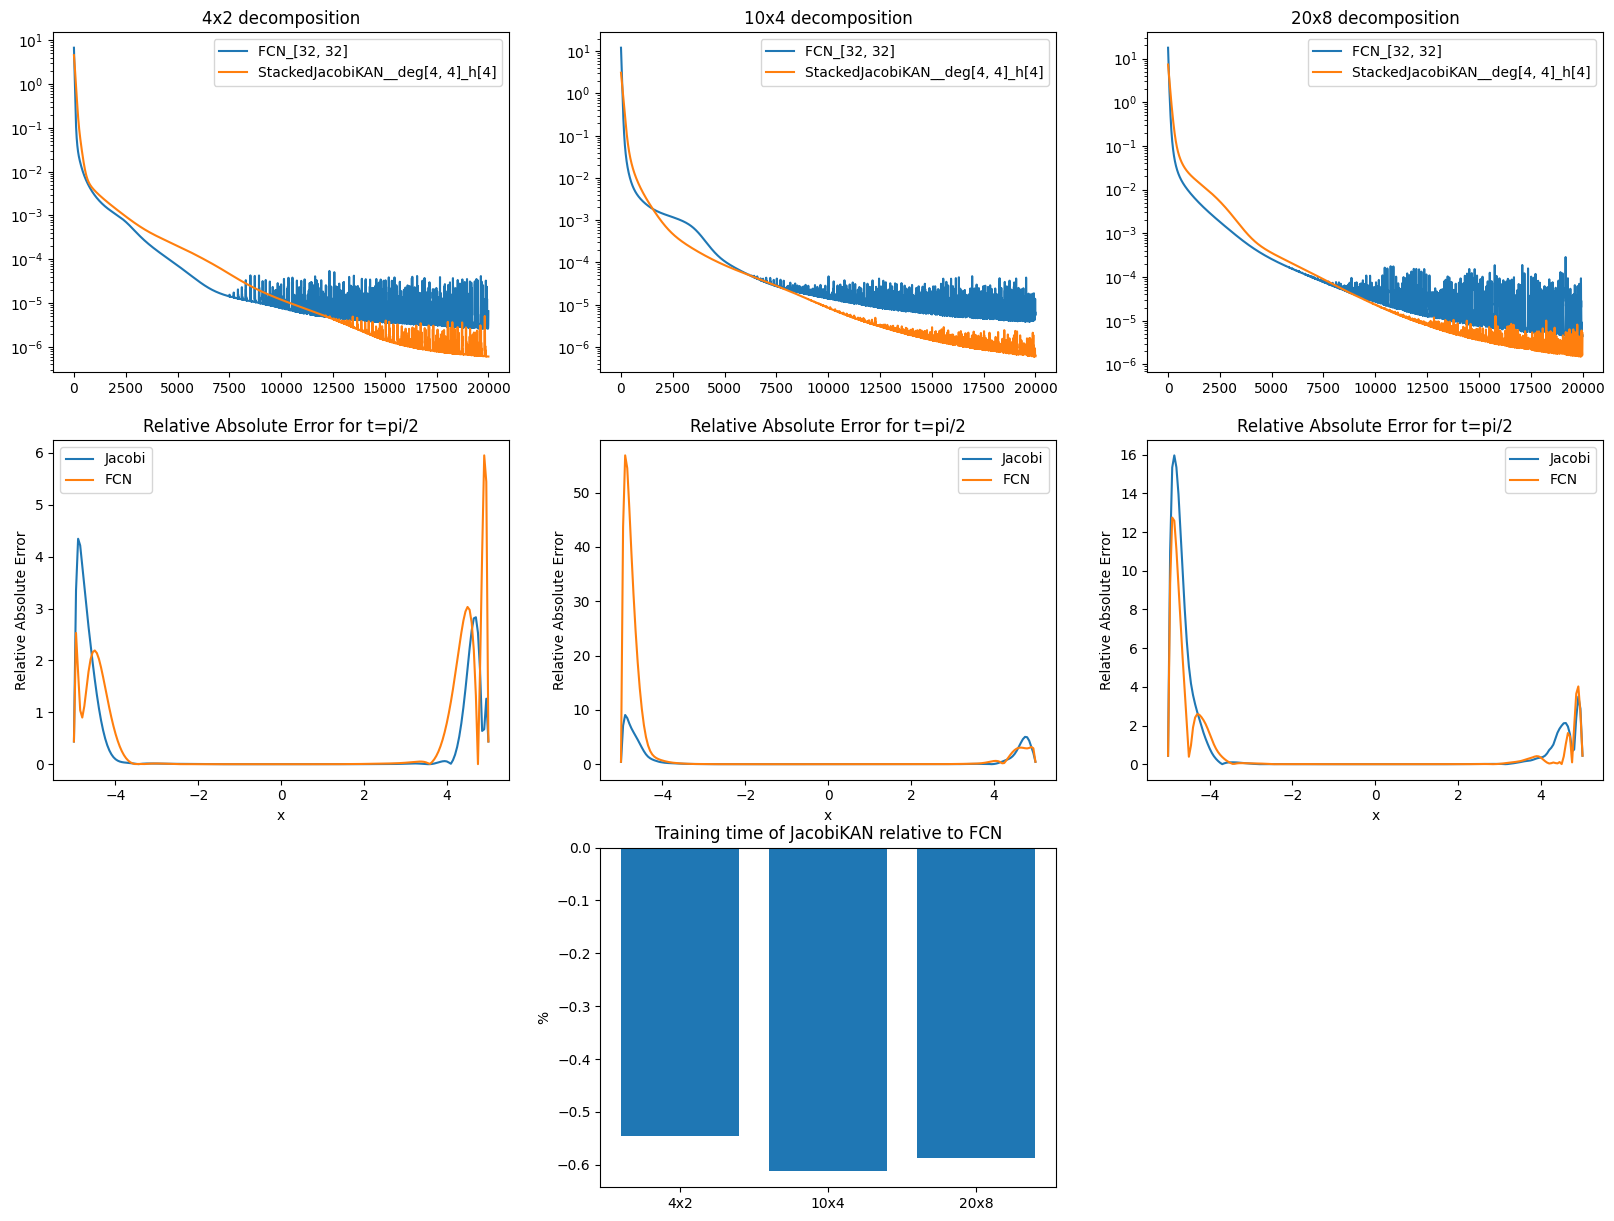

In [35]:
plt.figure(figsize=(20, 15))
rae = lambda exact, pred: (np.abs(exact - pred) / (np.abs(exact)))

decomps = ['4_2', '10_4', '20_8']
times = {
    d: {
        a: None for a in analyser.runs
        }
    for d in decomps
    }
for n, d in enumerate(decomps):
    plt.subplot(3, 3, n+1)
    test_name = f'Schrodinger1D_Stationary_{d}'
    test_path = os.path.join(run_path, test_name)
    runs = sorted([m for m in os.listdir(test_path) if os.path.isdir(os.path.join(test_path, m))])
    analyser = RunAnalyser(runs, test_path)
    m = analyser.get_mses()
    for k, v in m.items():
        plt.plot(v, label=f'{k}')
    plt.legend()
    plt.title(f'{'x'.join(d.split('_'))} decomposition')
    plt.yscale('log')

    with open(f'/vol/bitbucket/ss7921/FBPINNs/benchmarks/runs/{test_name}/StackedJacobiKAN__deg[4, 4]_h[4]/test_0_20000.npy', 'rb') as f:
        pred_jkan = np.load(f).reshape(200, 50, -1)
    with open(f'/vol/bitbucket/ss7921/FBPINNs/benchmarks/runs/{test_name}/FCN_[32, 32]/test_0_20000.npy', 'rb') as f:
        pred_fcn = np.load(f).reshape(200, 50, -1)
    with open(f'/vol/bitbucket/ss7921/FBPINNs/benchmarks/runs/{test_name}/StackedJacobiKAN__deg[4, 4]_h[4]/test_exact_0.npy', 'rb') as f:
        exact = np.load(f).reshape(200, 50, -1)

    slice=0
    plt.subplot(3, 3, 3+n+1)
    xs = np.linspace(-5, 5, 200)
    plt.plot(xs, rae(exact[:, 25, slice], pred_jkan[:, 25, slice]), label='Jacobi')
    plt.plot(xs, rae(exact[:, 25, slice], pred_fcn[:, 25, slice]), label='FCN')
    plt.legend()
    # plt.yscale('log')
    plt.xlabel('x')
    plt.ylabel('Relative Absolute Error')
    plt.title('Relative Absolute Error for t=pi/2')
    for k, v in analyser.get_training_time().items():
        times[d][k] = v
    
plt.subplot(3, 3, 8)
relative_times = [(- times[d]['FCN_[32, 32]'] + times[d]['StackedJacobiKAN__deg[4, 4]_h[4]'])/times[d]['FCN_[32, 32]'] for d in decomps]
plt.bar(['x'.join(d.split('_')) for d in decomps], relative_times)
plt.title('Training time of JacobiKAN relative to FCN')
plt.ylabel('%')
plt.show()

In [26]:

print(times)

{'4_2': {'FCN_[32, 32]': 391.72168707847595, 'StackedJacobiKAN__deg[4, 4]_h[4]': 177.98761010169983}, '10_4': {'FCN_[32, 32]': 518.8950312137604, 'StackedJacobiKAN__deg[4, 4]_h[4]': 201.25308346748352}, '20_8': {'FCN_[32, 32]': 569.1016488075256, 'StackedJacobiKAN__deg[4, 4]_h[4]': 235.02310419082642}}


In [30]:
relative_times = [(-times[d]['FCN_[32, 32]'] + times[d]['StackedJacobiKAN__deg[4, 4]_h[4]'])/times[d]['FCN_[32, 32]'] for d in decomps]
relative_times

[-0.5456273778734071, -0.6121506829681383, -0.5870278979453231]